In [1]:
import pandas as pd
import numpy as np

# prepare Data

In [2]:
skip_plot = False
file_path = './data/data_scm_FR_2015-2024.csv'
data = pd.read_csv(file_path)

In [4]:
data.columns

Index(['timestamp', 'price_da', 'carbon_price', 'gas_price', 'oil_price',
       'solar_da', 'wind_off_da', 'wind_on_da', 'load_da', 'load',
       'nuclear_unavail', 'nuclear_cap', 'nuclear_avail', 'generation_da',
       'biomass_gen', 'gas_gen', 'hard_coal_gen', 'hard_coal_cons', 'oil_gen',
       'hydro_storage_gen', 'hydro_storage_cons', 'run_off_gen',
       'run_off_cons', 'hydro_reservoir_gen', 'hydro_reservoir_cons',
       'nuclear_gen', 'solar_gen', 'waste_gen', 'wind_off_gen',
       'wind_off_cons', 'wind_on_gen', 'temp_paris', 'temp_marseille',
       'temp_lyon', 'temp_toulouse', 'temp_nice', 'temp_nantes',
       'temp_strasbourg', 'temp_montpellier', 'temp_bordeaux', 'temp_lille',
       'temp_mean', 'FR<-BE', 'FR<-CH', 'FR<-DE_AT_LU', 'FR<-DE_LU', 'FR<-ES',
       'FR<-GB', 'FR<-IT_NORD', 'FR<-IT_NORD_FR', 'solar_da_ramp',
       'wind_off_da_ramp', 'wind_on_da_ramp', 'load_da_ramp', 'ramperation_da',
       'biomass_ramp', 'gas_ramp', 'hard_coal_ramp', 'oil_ramp',
  

In [5]:
data.rename(columns={'Unnamed: 0': 'timestamp'}, inplace=True)
data.rename(columns={'ramperation_da': 'generation_da_ramp'}, inplace=True)
seed = 0

version = 'v5'

data.index = pd.to_datetime(data['timestamp'])# add timestamp index

# add moving average temp of last 7 days
data['temp_mean_7d_avg'] = data['temp_mean'].rolling('7d').mean()

# add total wind_da and wind_da_ramp as columns
data['wind_da'] = data['wind_on_da'] + data['wind_off_da'].fillna(value=0)
data['wind_da_ramp'] = data['wind_on_da_ramp'] + data['wind_off_da_ramp'].fillna(value=0)

<Axes: xlabel='timestamp'>

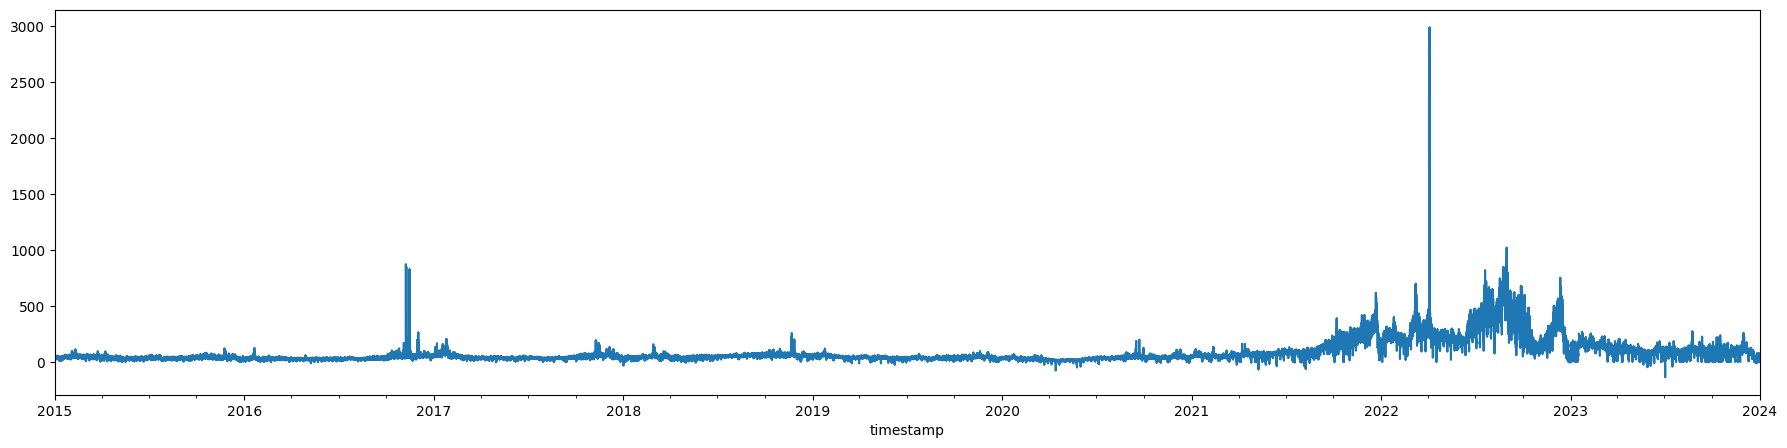

In [13]:
data['price_da'].plot(figsize=(22, 5))

In [14]:
print(data.columns)

Index(['timestamp', 'price_da', 'carbon_price', 'gas_price', 'oil_price',
       'solar_da', 'wind_off_da', 'wind_on_da', 'load_da', 'load',
       'nuclear_unavail', 'nuclear_cap', 'nuclear_avail', 'generation_da',
       'biomass_gen', 'gas_gen', 'hard_coal_gen', 'hard_coal_cons', 'oil_gen',
       'hydro_storage_gen', 'hydro_storage_cons', 'run_off_gen',
       'run_off_cons', 'hydro_reservoir_gen', 'hydro_reservoir_cons',
       'nuclear_gen', 'solar_gen', 'waste_gen', 'wind_off_gen',
       'wind_off_cons', 'wind_on_gen', 'temp_paris', 'temp_marseille',
       'temp_lyon', 'temp_toulouse', 'temp_nice', 'temp_nantes',
       'temp_strasbourg', 'temp_montpellier', 'temp_bordeaux', 'temp_lille',
       'temp_mean', 'FR<-BE', 'FR<-CH', 'FR<-DE_AT_LU', 'FR<-DE_LU', 'FR<-ES',
       'FR<-GB', 'FR<-IT_NORD', 'FR<-IT_NORD_FR', 'solar_da_ramp',
       'wind_off_da_ramp', 'wind_on_da_ramp', 'load_da_ramp',
       'generation_da_ramp', 'biomass_ramp', 'gas_ramp', 'hard_coal_ramp',
       'oi

In [15]:
columns_to_keep = ['carbon_price', 'gas_price', 'oil_price', 
                   'solar_da', 'wind_da', 'load_da', 'nuclear_avail', 
                   'generation_da', 'temp_mean', 'temp_mean_7d_avg',
                   'solar_da_ramp', 'wind_da_ramp', 'load_da_ramp', 
                   'generation_da_ramp']

In [16]:
len(columns_to_keep)

14

### drop columns containing NaN

In [17]:
na_col = columns_to_keep.copy()
na_col.append('price_da')

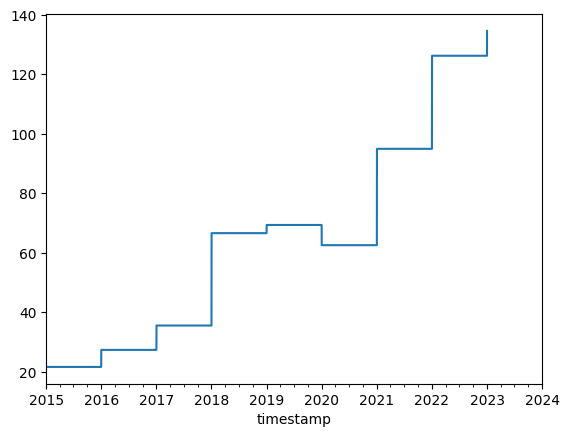

In [19]:
if not skip_plot:
    data['carbon_price'].plot()

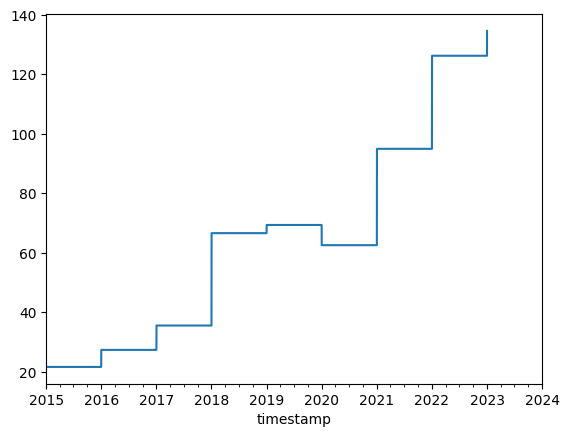

In [20]:
if not skip_plot:
    data['carbon_price'].plot()
# fill only until end timeseries (however, data only available until end of 2023, do not use data after that)
data['carbon_price'].ffill(inplace=True)

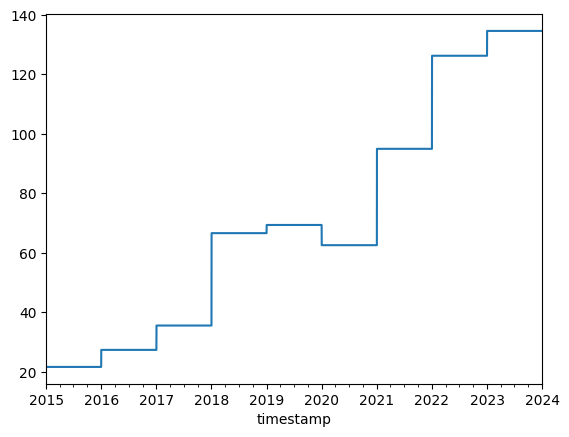

In [21]:
if not skip_plot:
    data['carbon_price'].plot()

In [22]:
data[na_col].isna().sum()

carbon_price             0
gas_price                0
oil_price             2137
solar_da               581
wind_da                558
load_da                355
nuclear_avail            0
generation_da          216
temp_mean                0
temp_mean_7d_avg         0
solar_da_ramp          609
wind_da_ramp           597
load_da_ramp           381
generation_da_ramp     224
price_da                95
dtype: int64

In [23]:
prev_col = data.shape[0]
nr_dropped_col = data[na_col].isna().any(axis=1).sum()
data.dropna(how='any', inplace=True, subset = na_col)
new_col = data.shape[0]
print("Dropped {} of {} columns, remaining columns: {}".format(nr_dropped_col, prev_col, new_col))

Dropped 3203 of 78889 columns, remaining columns: 75686


In [24]:
X = data[columns_to_keep].copy()
timestamp = X.index
X['month'] = timestamp.month
X.loc[:,'dayofyear_sin'] = np.sin(timestamp.dayofyear/365*2*np.pi)
X.loc[:,'dayofyear_cos'] = np.cos(timestamp.dayofyear/365*2*np.pi)
X.loc[:,'hour_sin'] = np.sin((timestamp.hour + timestamp.minute/60)/24*2*np.pi)
X.loc[:,'hour_cos'] = np.cos((timestamp.hour + timestamp.minute/60)/24*2*np.pi)
X['day_of_week'] = timestamp.day_of_week

In [25]:
y = data['price_da'].to_frame(name='price_da')

In [26]:
print("len(X)={}, len(y)={}".format(len(X), len(y)))

len(X)=75686, len(y)=75686


## Save data back to file

In [27]:
y.to_csv('./data/{}/y_full.csv'.format(version), sep=',', index=True)
X.to_csv('./data/{}/X_full.csv'.format(version), sep=',', index=True)